In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
from sklearn.cluster import KMeans

<h1>Aufgabe 1 a)</h1>

In [ ]:
mean =[2,-2]
cov = [[0.9,0.2],[0.2,0.3]]

In [ ]:
for n_samples in [50, 5000]: 
    X = np.random.multivariate_normal(mean,cov,n_samples)
    plt.scatter(X[:,0], X[:,1])
    plt.axis('equal')
    plt.show()

In [ ]:
mean1 = np.mean(X,axis=0)
X_arr = np.array(X)

In [ ]:
C = np.cov(X_arr.T)
print(C)

In [ ]:
# C = np.zeros((2, 2))
# dC = np.zeros((2, 2))
# for x in X_arr:
#         d1 = (x[0] - mean1[0])
#         d2 = (x[1] - mean1[1])
#         dC = [[d1*d1, d1*d2],[d1*d2, d2*d2]]
#         C = np.add(C, dC)

# C = C/len(X_arr)
# print(C)
# print(len(X_arr))

<h1>Aufgabe 1 b)</h1>

In [ ]:
mean1_exact = [0,0,0]
mean2_exact = [1,2,2]
mean3_exact = [3,3,4]
# cov = 0.8*np.identity(3)
cov = np.array([[0.8,0.2,0.1],[0.2,0.8,0.2],[0.1,0.2,0.8]])
n_samples = 999

In [ ]:
D1 = np.random.multivariate_normal(mean1_exact,cov,int(n_samples/3))
D2 = np.random.multivariate_normal(mean2_exact,cov,int(n_samples/3))
D3 = np.random.multivariate_normal(mean3_exact,cov,int(n_samples/3))
D = np.concatenate((D1,D2,D3), axis=0)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(D[:,0], D[:,1],D[:,2])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [ ]:
mean1 = np.mean(D1,axis=0)
Cov1 = np.cov(D1.T)
mean2 = np.mean(D2,axis=0)
Cov2 = np.cov(D2.T)
mean3 = np.mean(D3,axis=0)
Cov3 = np.cov(D3.T)
Cov_Common = (Cov1 + Cov2 + Cov3)/3
print(mean1)
print(mean2)
print(mean3)
print(Cov_Common)

In [ ]:
T1 = np.random.multivariate_normal(mean1_exact,cov,int(n_samples/3))
T2 = np.random.multivariate_normal(mean2_exact,cov,int(n_samples/3))
T3 = np.random.multivariate_normal(mean3_exact,cov,int(n_samples/3))
T = np.concatenate((T1,T2,T3), axis=0)

In [ ]:
class_assing = []
n_correct = 0
for x in T:
    d1 = np.linalg.norm(x-mean1)
    d2 = np.linalg.norm(x-mean2)
    d3 = np.linalg.norm(x-mean3)

    m = min(d1,d2,d3)
    if m == d1:
        class_assing.append(1)
    elif m == d2:
        class_assing.append(2)
    elif m == d3:
        class_assing.append(3)

for i in range(len(class_assing)):
    if i < 333:
        if class_assing[i] == 1:
            n_correct +=1
    elif i >= 333 and  i < 666:
        if class_assing[i] == 2:
            n_correct +=1
    elif i >= 666 and  i < 999:
        if class_assing[i] == 3:
            n_correct +=1

correct_frac = n_correct/len(T)
print(correct_frac)

<h1>Aufgabe 2 a)</h1>

In [11]:
mean1_exact = [0,0]
mean2_exact = [3,3]
mean3_exact = [2,6]
cov1_exact = 0.1*np.identity(2)
cov2_exact = 0.2*np.identity(2)
cov3_exact = 0.3*np.identity(2)
n_samples = 600

In [12]:
D1 = np.random.multivariate_normal(mean1_exact,cov1_exact,int(n_samples*0.4))
D2 = np.random.multivariate_normal(mean2_exact,cov2_exact,int(n_samples*0.4))
D3 = np.random.multivariate_normal(mean3_exact,cov3_exact,int(n_samples*0.2))
D = np.concatenate((D1,D2,D3), axis=0)

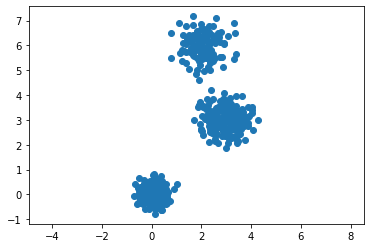

In [13]:
plt.scatter(D[:,0], D[:,1])
plt.axis('equal')
plt.show()

In [14]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='diag')
gmm.fit(D)

GaussianMixture(covariance_type='diag', n_components=3)

In [22]:
weights = gmm.weights_
print("weights:")
print(weights)

weights:
[0.2000852 0.4       0.3999148]


In [20]:
means = gmm.means_
print("means:")
print(means)

means:
[[2.04704754 5.96063463]
 [0.01506995 0.02840992]
 [2.9412886  3.03191963]]


In [21]:
covs = gmm.covariances_
print("covariances:")
print(covs)

covariances:
[[0.26102638 0.2535119 ]
 [0.09197186 0.08546707]
 [0.23671327 0.18883832]]


In [23]:
gmm_rand = mixture.GaussianMixture(n_components=3, covariance_type='diag', init_params='random')
gmm_rand.fit(D)

GaussianMixture(covariance_type='diag', init_params='random', n_components=3)

In [25]:
print("weights:")
print(gmm_rand.weights_)
print("means:")
print(gmm_rand.means_)
print("covariances:")
print(gmm_rand.covariances_)

weights:
[0.3750574  0.60015059 0.02479201]
means:
[[2.57826940e-03 2.29002780e-02]
 [2.64266183e+00 4.00766498e+00]
 [1.98236833e-01 1.09585785e-01]]
covariances:
[[0.08533565 0.08219199]
 [0.42316392 2.119658  ]
 [0.15130556 0.12760024]]


<h1> Aufgabe 3 </h1>

In [28]:
mean1_exact = [0,0]
mean2_exact = [10,0]
mean3_exact = [0,6]
mean4_exact = [9,8]
cov1_exact = np.identity(2)
cov2_exact = [[1,0.2],[0.2,1.5]]
cov3_exact = [[1,0.4],[0.4,1.1]]
cov4_exact = [[0.3,0.2],[0.2,0.5]]
n_samples = 1000

In [29]:
D1 = np.random.multivariate_normal(mean1_exact,cov1_exact,int(n_samples*0.25))
D2 = np.random.multivariate_normal(mean2_exact,cov2_exact,int(n_samples*0.25))
D3 = np.random.multivariate_normal(mean3_exact,cov3_exact,int(n_samples*0.25))
D4 = np.random.multivariate_normal(mean4_exact,cov4_exact,int(n_samples*0.25))
D = np.concatenate((D1,D2,D3,D4), axis=0)

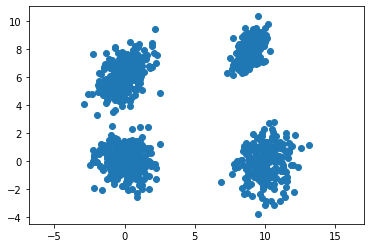

In [30]:
plt.scatter(D[:,0], D[:,1])
plt.axis('equal')
plt.show()

[[-0.02128434 -0.01310749]
 [-0.0989491   6.06243467]
 [ 9.97408241 -0.09623235]
 [ 8.94566539  7.99857252]]


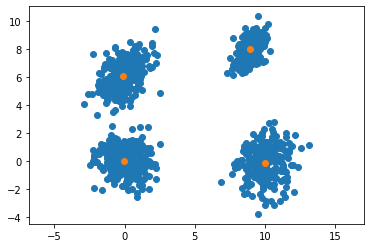

In [40]:
kmeans = KMeans(n_clusters=4, init='random', algorithm='full')
kmeans.fit(D)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(D[:,0], D[:,1])
plt.scatter(centers[:,0],centers[:,1])
plt.axis('equal')
plt.show()

[[ 8.94566539  7.99857252]
 [-0.06011672  3.02466359]
 [ 9.97408241 -0.09623235]]


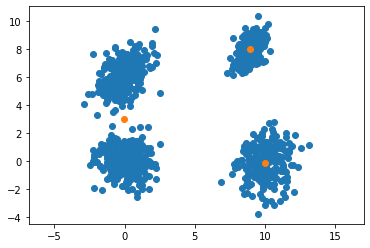

In [41]:
kmeans = KMeans(n_clusters=3, init='random', algorithm='full')
kmeans.fit(D)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(D[:,0], D[:,1])
plt.scatter(centers[:,0],centers[:,1])
plt.axis('equal')
plt.show()

[[ 9.97408241 -0.09623235]
 [ 8.94566539  7.99857252]
 [-0.01768485 -0.02312858]
 [ 0.40493839  6.72168037]
 [-0.83092928  5.08040889]]


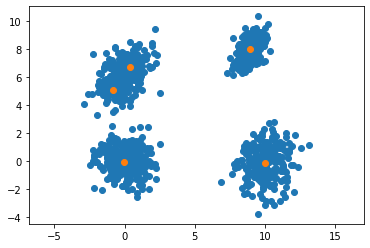

In [42]:
kmeans = KMeans(n_clusters=5, init='random', algorithm='full')
kmeans.fit(D)
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(D[:,0], D[:,1])
plt.scatter(centers[:,0],centers[:,1])
plt.axis('equal')
plt.show()